In [1]:
#import libraries
import sqlite3
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, LabelBinarizer, MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
#connect to the data.db database
conn = sqlite3.connect('data.db')
cursor = conn.cursor()

In [2]:
outcomes_df = pd.read_sql_query("select * from Outcomes", conn)
outcomes_df
# outcomes_df[outcomes_df.y=='yes']
# outcomes_df.shape

print(f'the unique values in outcome of the prev martketing campaign: {outcomes_df.poutcome.unique()}')
print(f'the unique values in subscription of term deposit: {outcomes_df.y.unique()}')

the unique values in outcome of the prev martketing campaign: ['unknown' 'failure' 'other' 'success']
the unique values in subscription of term deposit: ['unknown' 'no' 'yes']


In [3]:
#filtering out columns where successful campaign outcome matches with subscribed deposit - doesnt make sense
filtered_df = outcomes_df[(outcomes_df.y == 'yes') & (outcomes_df.poutcome == 'success')]

filtered_df
print(f'percentage of actual subscription with respect to campaign success: {(filtered_df.shape[0] / outcomes_df[outcomes_df.poutcome == "success"].shape[0]) * 100}%')


percentage of actual subscription with respect to campaign success: 5.493050959629384%


In [3]:
clients_df = pd.read_sql_query("select * from Clients", conn)
campaigns_df = pd.read_sql_query("select * from Campaigns", conn)
accounts_df = pd.read_sql_query("select * from Accounts", conn)

In [4]:
# joining dataframes

# To connect the Outcomes and Campaigns tables from your SQLite database on the Campaigns.ID and Outcomes.campaign_id

# query = """
# SELECT *
# FROM Outcomes
# JOIN Campaigns
# ON Outcomes.campaign_id = Campaigns.ID
# JOIN Accounts
# ON Campaigns.account_id = Accounts.ID
# JOIN Clients
# ON Accounts.client_id = Clients.ID;
# """

query = """
SELECT
c.id AS client_id,
c.age,
c.job,
c.marital,
c.education,
a.balance,
a.in_default,
a.housing,
a.loan,
ca.duration,
ca.campaign,
ca.pdays,
ca.previous,
o.poutcome,
o.y
FROM Clients c
JOIN Accounts a ON c.id = a.client_id
JOIN Campaigns ca ON a.id = ca.account_id
JOIN Outcomes o ON ca.id = o.campaign_id;
"""

# Execute the query and fetch the result into a DataFrame
merged_df = pd.read_sql_query(query, conn)

# Display the joined DataFrame


# # Export to CSV
# merged_ = "merged_table.csv"  # Replace with your desired CSV file name
# merged_pd.to_csv(merged_csv, index=False)

merged_df

,client_id,age,job,marital,education,balance,in_default,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,4815378,58,management,married,tertiary,2143.0,no,yes,no,261,1,-1,0,unknown,unknown
1,5217541,44,technician,single,secondary,29.0,no,yes,no,151,1,-1,0,unknown,unknown
2,6654642,33,entrepreneur,married,secondary,2.0,no,yes,yes,76,1,-1,0,unknown,unknown
3,1421898,47,blue-collar,married,unknown,1506.0,no,yes,no,92,1,-1,0,unknown,unknown
4,2387933,33,unknown,single,unknown,1.0,no,no,no,198,1,-1,0,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,6145087,51,technician,married,tertiary,825.0,no,no,no,977,3,-1,0,unknown,unknown
45207,8051149,71,retired,divorced,primary,1729.0,no,no,no,456,2,-1,0,unknown,unknown
45208,9198356,72,retired,married,secondary,5715.0,no,no,no,1127,5,184,3,success,unknown
45209,3187020,57,blue-collar,married,secondary,668.0,no,no,no,508,4,-1,0,unknown,unknown


In [6]:
# Find the index where the balance is minimum
min_balance_index = merged_df[merged_df['balance'] == merged_df['balance'].min()].index

print(f"Index of the row with the minimum balance: {min_balance_index.tolist()}")

Index of the row with the minimum balance: [12909]


In [7]:
#checking for missing values in the table
print(merged_df.isna().sum())  # Check for missing values
merged_df_old = merged_df.copy() #retaining the dataframe before transformation

# Identify duplicate rows
duplicates = merged_df[merged_df.duplicated()]

# Display duplicates
print("Duplicate rows:")
print(duplicates)

client_id     0
age           0
job           0
marital       0
education     0
balance       0
in_default    0
housing       0
loan          0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
y             0
dtype: int64
Duplicate rows:
Empty DataFrame
Columns: [client_id, age, job, marital, education, balance, in_default, housing, loan, duration, campaign, pdays, previous, poutcome, y]
Index: []


In [8]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the data into numerical labels

merged_df['marital'] = label_encoder.fit_transform(merged_df['marital'])
print('MARITAL converted to number: ')
mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print(mapping)
print()
print('--------------------------------')

merged_df['housing'] = label_encoder.fit_transform(merged_df['housing'])
print('HOUSING converted to number: ')
mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print(mapping)
print()
print('--------------------------------')

merged_df['loan'] = label_encoder.fit_transform(merged_df['loan'])
print('LOAN converted to number: ')
mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print(mapping)
print()
print('--------------------------------')

merged_df['in_default'] = label_encoder.fit_transform(merged_df['in_default'])
print('default credit: ')
mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print(mapping)
print()
print('--------------------------------')

merged_df['y'] = label_encoder.fit_transform(merged_df['y'])
print('Y converted to number: ')
mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print(mapping)
print()
print('--------------------------------')

MARITAL converted to number: 
{'divorced': 0, 'married': 1, 'single': 2}

--------------------------------
HOUSING converted to number: 
{'no': 0, 'yes': 1}

--------------------------------
LOAN converted to number: 
{'no': 0, 'yes': 1}

--------------------------------
default credit: 
{'no': 0, 'yes': 1}

--------------------------------
Y converted to number: 
{'no': 0, 'unknown': 1, 'yes': 2}

--------------------------------


In [9]:
merged_df

,client_id,age,job,marital,education,balance,in_default,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,4815378,58,management,1,tertiary,2143.0,0,1,0,261,1,-1,0,unknown,1
1,5217541,44,technician,2,secondary,29.0,0,1,0,151,1,-1,0,unknown,1
2,6654642,33,entrepreneur,1,secondary,2.0,0,1,1,76,1,-1,0,unknown,1
3,1421898,47,blue-collar,1,unknown,1506.0,0,1,0,92,1,-1,0,unknown,1
4,2387933,33,unknown,2,unknown,1.0,0,0,0,198,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,6145087,51,technician,1,tertiary,825.0,0,0,0,977,3,-1,0,unknown,1
45207,8051149,71,retired,0,primary,1729.0,0,0,0,456,2,-1,0,unknown,1
45208,9198356,72,retired,1,secondary,5715.0,0,0,0,1127,5,184,3,success,1
45209,3187020,57,blue-collar,1,secondary,668.0,0,0,0,508,4,-1,0,unknown,1


In [10]:
# merged_df['job'] = label_encoder.fit_transform(merged_df['job'])
# print('JOB converted to number): ')
# mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
# print(mapping)
# print()
# print('--------------------------------')


# merged_df['education'] = label_encoder.fit_transform(merged_df['education'])
# print('EDUCATION converted to number: ')
# mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
# print(mapping)
# print()
# print('--------------------------------')

# merged_df['poutcome_nr'] = label_encoder.fit_transform(merged_df['poutcome'])
# print('POUTCOME converted to number: ')
# mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
# print(mapping)
# print()
# print('--------------------------------')

In [11]:
#picking out rows where they said subscribed to deposit (y=2) and did no (y=0)
condition = (merged_df.y == 2) | (merged_df.y ==0)
y_with_outcome = merged_df[condition]
y_with_outcome

,client_id,age,job,marital,education,balance,in_default,housing,loan,duration,campaign,pdays,previous,poutcome,y
7,5561468,42,entrepreneur,0,tertiary,2.0,1,1,0,380,1,-1,0,unknown,0
9,5203129,43,technician,2,secondary,593.0,0,1,0,55,1,-1,0,unknown,0
14,6633578,57,services,1,secondary,162.0,0,1,0,174,1,-1,0,unknown,0
30,9718018,57,technician,1,secondary,839.0,0,0,1,225,1,-1,0,unknown,0
33,1174906,59,blue-collar,1,secondary,0.0,0,1,0,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45160,4645105,35,technician,1,secondary,0.0,0,1,0,524,1,96,5,success,2
45173,2354794,36,admin.,2,tertiary,980.0,0,0,0,118,4,104,7,failure,0
45191,9424440,75,retired,0,tertiary,3810.0,0,1,0,262,1,183,1,failure,2
45197,2721327,36,management,2,secondary,1511.0,0,1,0,270,1,-1,0,unknown,2


In [12]:
#picking out rows where y is unknown
condition3= merged_df.y ==1 #1 - unknown
y_unknown =merged_df[condition3]
y_unknown

,client_id,age,job,marital,education,balance,in_default,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,4815378,58,management,1,tertiary,2143.0,0,1,0,261,1,-1,0,unknown,1
1,5217541,44,technician,2,secondary,29.0,0,1,0,151,1,-1,0,unknown,1
2,6654642,33,entrepreneur,1,secondary,2.0,0,1,1,76,1,-1,0,unknown,1
3,1421898,47,blue-collar,1,unknown,1506.0,0,1,0,92,1,-1,0,unknown,1
4,2387933,33,unknown,2,unknown,1.0,0,0,0,198,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,6145087,51,technician,1,tertiary,825.0,0,0,0,977,3,-1,0,unknown,1
45207,8051149,71,retired,0,primary,1729.0,0,0,0,456,2,-1,0,unknown,1
45208,9198356,72,retired,1,secondary,5715.0,0,0,0,1127,5,184,3,success,1
45209,3187020,57,blue-collar,1,secondary,668.0,0,0,0,508,4,-1,0,unknown,1


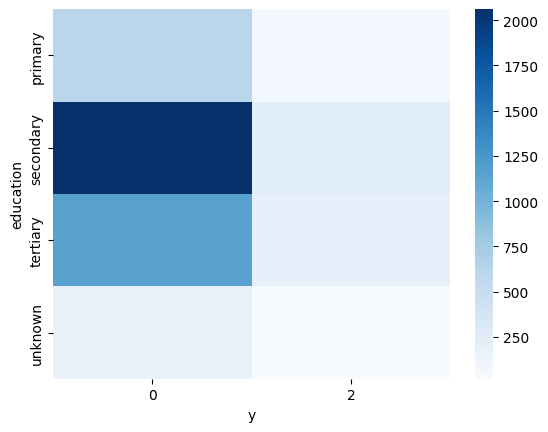

In [13]:
#creating the contingency table
cont_table = pd.crosstab(index=y_with_outcome['education'], columns=y_with_outcome['y'])
cont_table

sns.heatmap(cont_table, cmap='Blues')
plt.xlabel('y')
plt.ylabel('education')
plt.show()

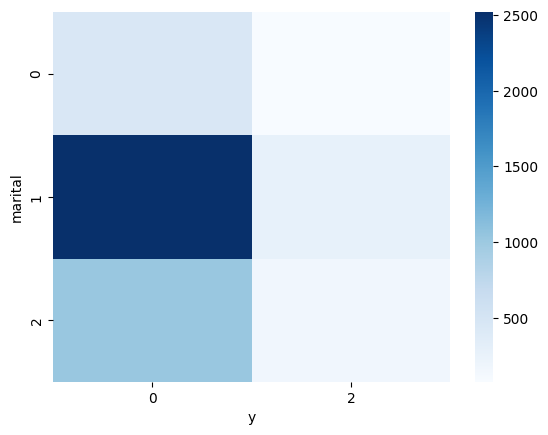

In [14]:
#creating the contingency table
cont_table = pd.crosstab(index=y_with_outcome['marital'], columns=y_with_outcome['y'])
cont_table

sns.heatmap(cont_table, cmap='Blues')
plt.xlabel('y')
plt.ylabel('marital')
plt.show()

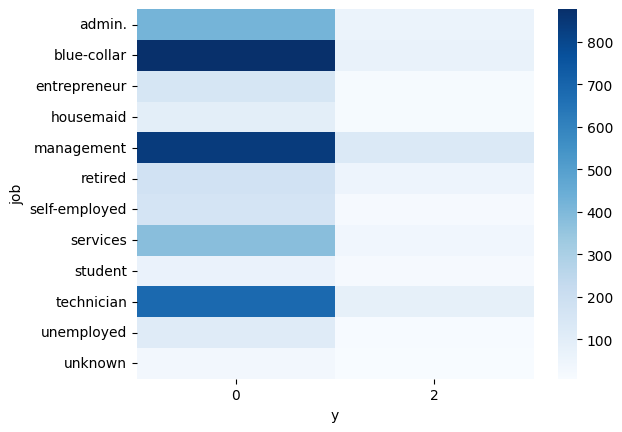

In [15]:
#creating the contingency table
cont_table = pd.crosstab(index=y_with_outcome['job'], columns=y_with_outcome['y'])
cont_table

sns.heatmap(cont_table, cmap='Blues')
plt.xlabel('y')
plt.ylabel('job')
plt.show()


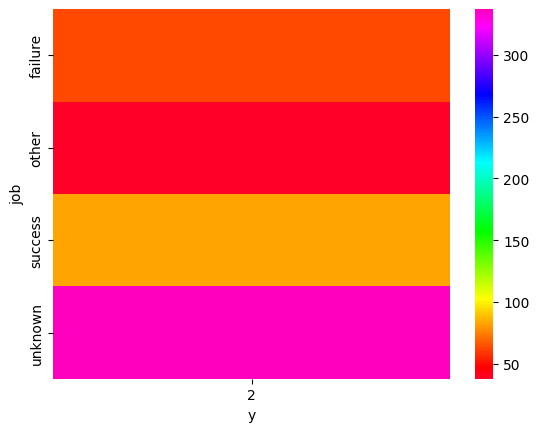

In [16]:
#creating the contingency table
cont_table = pd.crosstab(index=y_with_outcome['poutcome'], columns=y_with_outcome.y[y_with_outcome.y==2])
cont_table

sns.heatmap(cont_table, cmap='gist_rainbow')
plt.xlabel('y')
plt.ylabel('job')
plt.show()


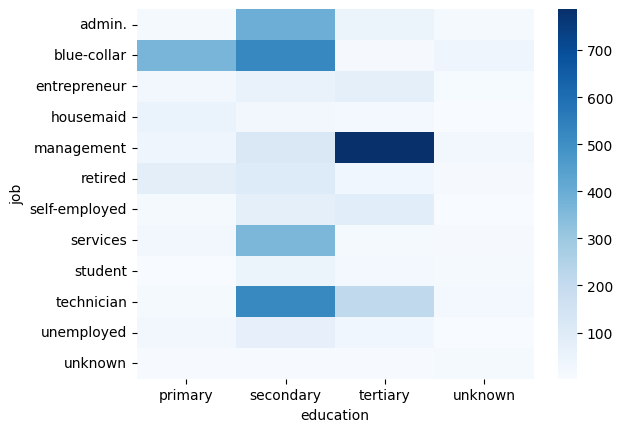

In [17]:
#creating the contingency table
cont_table = pd.crosstab(index=y_with_outcome['job'], columns=y_with_outcome['education'])
cont_table

sns.heatmap(cont_table, cmap='Blues')
plt.xlabel('education')
plt.ylabel('job')
plt.show()


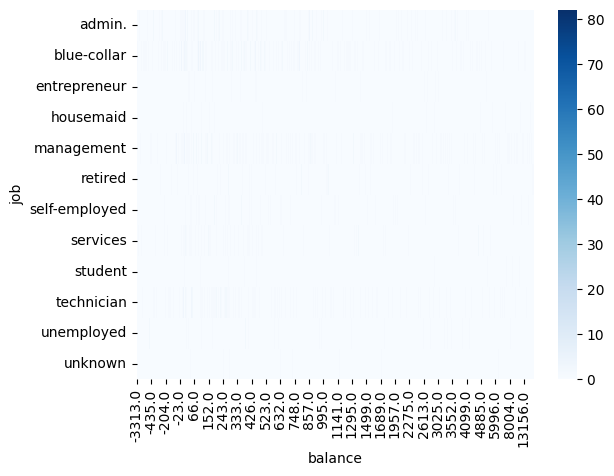

In [18]:
#creating the contingency table
cont_table = pd.crosstab(index=y_with_outcome['job'], columns=y_with_outcome['balance'])
cont_table

sns.heatmap(cont_table, cmap='Blues')
plt.xlabel('balance')
plt.ylabel('job')
plt.show()

In [19]:
data = y_with_outcome.copy()
data

,client_id,age,job,marital,education,balance,in_default,housing,loan,duration,campaign,pdays,previous,poutcome,y
7,5561468,42,entrepreneur,0,tertiary,2.0,1,1,0,380,1,-1,0,unknown,0
9,5203129,43,technician,2,secondary,593.0,0,1,0,55,1,-1,0,unknown,0
14,6633578,57,services,1,secondary,162.0,0,1,0,174,1,-1,0,unknown,0
30,9718018,57,technician,1,secondary,839.0,0,0,1,225,1,-1,0,unknown,0
33,1174906,59,blue-collar,1,secondary,0.0,0,1,0,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45160,4645105,35,technician,1,secondary,0.0,0,1,0,524,1,96,5,success,2
45173,2354794,36,admin.,2,tertiary,980.0,0,0,0,118,4,104,7,failure,0
45191,9424440,75,retired,0,tertiary,3810.0,0,1,0,262,1,183,1,failure,2
45197,2721327,36,management,2,secondary,1511.0,0,1,0,270,1,-1,0,unknown,2


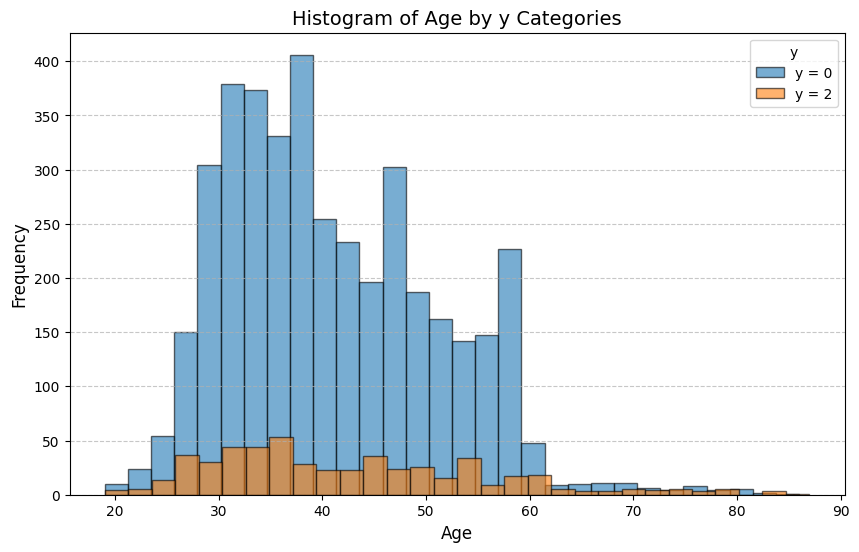

In [ ]:
import matplotlib.pyplot as plt

# Plot the histogram of age grouped by the values of 'y'
plt.figure(figsize=(10, 6))

# Loop through each category in 'y' and plot its corresponding histogram
categories = data['y'].unique()
for category in categories:
    subset = data[data['y'] == category]
    plt.hist(subset['age'], bins=30, alpha=0.6, label=f"y = {category}", edgecolor='black')

# Add labels, title, legend, and grid
plt.title('Histogram of Age by y Categories', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title="y", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
#group by ages

In [21]:
def categorize_income(row):
    education = row['education']
    job = row['job']
    
    if job in ['student', 'retired', 'unemployed']:
        return 'non-working'
    elif education == 'tertiary':
        return 'high income'
    elif education == 'secondary':
        return 'middle income'
    elif education == 'primary':
        return 'low income'
    else:
        return 'other'

# Apply the function to create the new column
data['income_category'] = data.apply(categorize_income, axis=1)
data

,client_id,age,job,marital,education,balance,in_default,housing,loan,duration,campaign,pdays,previous,poutcome,y,income_category
7,5561468,42,entrepreneur,0,tertiary,2.0,1,1,0,380,1,-1,0,unknown,0,high income
9,5203129,43,technician,2,secondary,593.0,0,1,0,55,1,-1,0,unknown,0,middle income
14,6633578,57,services,1,secondary,162.0,0,1,0,174,1,-1,0,unknown,0,middle income
30,9718018,57,technician,1,secondary,839.0,0,0,1,225,1,-1,0,unknown,0,middle income
33,1174906,59,blue-collar,1,secondary,0.0,0,1,0,226,1,-1,0,unknown,0,middle income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45160,4645105,35,technician,1,secondary,0.0,0,1,0,524,1,96,5,success,2,middle income
45173,2354794,36,admin.,2,tertiary,980.0,0,0,0,118,4,104,7,failure,0,high income
45191,9424440,75,retired,0,tertiary,3810.0,0,1,0,262,1,183,1,failure,2,non-working
45197,2721327,36,management,2,secondary,1511.0,0,1,0,270,1,-1,0,unknown,2,middle income


In [22]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Select the columns to be one-hot encoded
columns_to_encode = ['income_category']

# Initialize the OneHotEncoder
ohe_encoder = OneHotEncoder(handle_unknown='ignore')  # drop='first' avoids the dummy variable trap

# Apply the encoder to the specified columns
encoded_data = ohe_encoder.fit_transform(data[columns_to_encode])

# Convert the encoded data to a DataFrame
encoded_columns = ohe_encoder.get_feature_names_out(columns_to_encode)

# Convert the sparse matrix to a dense array
encoded_dense = encoded_data.toarray()

# Create a DataFrame from the dense array with appropriate column names
encoded_df = pd.DataFrame(encoded_dense, columns=ohe_encoder.get_feature_names_out(columns_to_encode))
encoded_df


,income_category_high income,income_category_low income,income_category_middle income,income_category_non-working,income_category_other
0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
4516,0.0,0.0,1.0,0.0,0.0
4517,1.0,0.0,0.0,0.0,0.0
4518,0.0,0.0,0.0,1.0,0.0
4519,0.0,0.0,1.0,0.0,0.0


In [23]:
# Reset index for both DataFrames
data = data.reset_index(drop=True)
encoded_df = encoded_df.reset_index(drop=True)

# Perform horizontal concatenation
horizontal_concat = pd.concat([data, encoded_df], axis=1)

horizontal_concat.drop(['job', 'education','income_category','campaign', 'marital'], axis=1)

,client_id,age,balance,in_default,housing,loan,duration,pdays,previous,poutcome,y,income_category_high income,income_category_low income,income_category_middle income,income_category_non-working,income_category_other
0,5561468,42,2.0,1,1,0,380,-1,0,unknown,0,1.0,0.0,0.0,0.0,0.0
1,5203129,43,593.0,0,1,0,55,-1,0,unknown,0,0.0,0.0,1.0,0.0,0.0
2,6633578,57,162.0,0,1,0,174,-1,0,unknown,0,0.0,0.0,1.0,0.0,0.0
3,9718018,57,839.0,0,0,1,225,-1,0,unknown,0,0.0,0.0,1.0,0.0,0.0
4,1174906,59,0.0,0,1,0,226,-1,0,unknown,0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,4645105,35,0.0,0,1,0,524,96,5,success,2,0.0,0.0,1.0,0.0,0.0
4517,2354794,36,980.0,0,0,0,118,104,7,failure,0,1.0,0.0,0.0,0.0,0.0
4518,9424440,75,3810.0,0,1,0,262,183,1,failure,2,0.0,0.0,0.0,1.0,0.0
4519,2721327,36,1511.0,0,1,0,270,-1,0,unknown,2,0.0,0.0,1.0,0.0,0.0


In [24]:
# Define the conditions for categorizing ages
conditions = [
    horizontal_concat['age'] < 35,
    (horizontal_concat['age'] >= 35) & (horizontal_concat['age'] < 60),
    horizontal_concat['age'] >= 60
]

# Define the corresponding categories
choices = ['young', 'middle', 'old']

# Apply the conditions and create a new column for age categories
horizontal_concat['age_category'] = np.select(conditions, choices, default='unknown')



In [25]:
cleaned_df = horizontal_concat.drop(['marital','age','job', 'education', 'income_category', 'campaign'], axis=1)
cleaned_df

,client_id,balance,in_default,housing,loan,duration,pdays,previous,poutcome,y,income_category_high income,income_category_low income,income_category_middle income,income_category_non-working,income_category_other,age_category
0,5561468,2.0,1,1,0,380,-1,0,unknown,0,1.0,0.0,0.0,0.0,0.0,middle
1,5203129,593.0,0,1,0,55,-1,0,unknown,0,0.0,0.0,1.0,0.0,0.0,middle
2,6633578,162.0,0,1,0,174,-1,0,unknown,0,0.0,0.0,1.0,0.0,0.0,middle
3,9718018,839.0,0,0,1,225,-1,0,unknown,0,0.0,0.0,1.0,0.0,0.0,middle
4,1174906,0.0,0,1,0,226,-1,0,unknown,0,0.0,0.0,1.0,0.0,0.0,middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,4645105,0.0,0,1,0,524,96,5,success,2,0.0,0.0,1.0,0.0,0.0,middle
4517,2354794,980.0,0,0,0,118,104,7,failure,0,1.0,0.0,0.0,0.0,0.0,middle
4518,9424440,3810.0,0,1,0,262,183,1,failure,2,0.0,0.0,0.0,1.0,0.0,old
4519,2721327,1511.0,0,1,0,270,-1,0,unknown,2,0.0,0.0,1.0,0.0,0.0,middle


In [26]:
cleaned_df.loc[cleaned_df['pdays'] < 0, 'pdays'] = 0
cleaned_df

,client_id,balance,in_default,housing,loan,duration,pdays,previous,poutcome,y,income_category_high income,income_category_low income,income_category_middle income,income_category_non-working,income_category_other,age_category
0,5561468,2.0,1,1,0,380,0,0,unknown,0,1.0,0.0,0.0,0.0,0.0,middle
1,5203129,593.0,0,1,0,55,0,0,unknown,0,0.0,0.0,1.0,0.0,0.0,middle
2,6633578,162.0,0,1,0,174,0,0,unknown,0,0.0,0.0,1.0,0.0,0.0,middle
3,9718018,839.0,0,0,1,225,0,0,unknown,0,0.0,0.0,1.0,0.0,0.0,middle
4,1174906,0.0,0,1,0,226,0,0,unknown,0,0.0,0.0,1.0,0.0,0.0,middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,4645105,0.0,0,1,0,524,96,5,success,2,0.0,0.0,1.0,0.0,0.0,middle
4517,2354794,980.0,0,0,0,118,104,7,failure,0,1.0,0.0,0.0,0.0,0.0,middle
4518,9424440,3810.0,0,1,0,262,183,1,failure,2,0.0,0.0,0.0,1.0,0.0,old
4519,2721327,1511.0,0,1,0,270,0,0,unknown,2,0.0,0.0,1.0,0.0,0.0,middle


In [27]:
# Assuming `cleaned_df` is your DataFrame and `col_to_encode` contains the column name
col_to_encode = ['age_category']

# Initialize the OneHotEncoder
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Use sparse_output instead of sparse

# Apply the encoder to the column
encoded_age = ohe_encoder.fit_transform(cleaned_df[col_to_encode])

# Get the feature names for the encoded columns
encoded_columns_age = ohe_encoder.get_feature_names_out(col_to_encode)

# Convert the encoded data to a DataFrame with appropriate column names
encoded_age_df = pd.DataFrame(encoded_age, columns=encoded_columns_age)

# Display the resulting DataFrame
encoded_age_df




,age_category_middle,age_category_old,age_category_young
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
4516,1.0,0.0,0.0
4517,1.0,0.0,0.0
4518,0.0,1.0,0.0
4519,1.0,0.0,0.0


In [28]:
# Reset index for both DataFrames
# data = data.reset_index(drop=True)
# encoded_df = encoded_df.reset_index(drop=True)

# Perform horizontal concatenation
horizontal_concat_age = pd.concat([cleaned_df, encoded_age_df], axis=1)

# horizontal_concat.drop(['job', 'education','income_category','campaign', 'marital'], axis=1)

In [29]:
ohe_dataframe = horizontal_concat_age.drop(['age_category'],axis=1)

In [30]:
encoder_poutcome = LabelEncoder()
ohe_dataframe['poutcome'] = encoder_poutcome.fit_transform(ohe_dataframe['poutcome'])
print('POUTCOME converted to number: ')
mapping = dict(zip(encoder_poutcome.classes_, range(len(encoder_poutcome.classes_))))
print(mapping)
print()
print('--------------------------------')

POUTCOME converted to number: 
{'failure': 0, 'other': 1, 'success': 2, 'unknown': 3}

--------------------------------


In [34]:
ohe_dataframe

,client_id,balance,in_default,housing,loan,duration,pdays,previous,poutcome,y,income_category_high income,income_category_low income,income_category_middle income,income_category_non-working,income_category_other,age_category_middle,age_category_old,age_category_young
0,5561468,2.0,1,1,0,380,0,0,3,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5203129,593.0,0,1,0,55,0,0,3,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,6633578,162.0,0,1,0,174,0,0,3,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,9718018,839.0,0,0,1,225,0,0,3,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1174906,0.0,0,1,0,226,0,0,3,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,4645105,0.0,0,1,0,524,96,5,2,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4517,2354794,980.0,0,0,0,118,104,7,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4518,9424440,3810.0,0,1,0,262,183,1,0,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4519,2721327,1511.0,0,1,0,270,0,0,3,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [38]:
ohe_dataframe['duration'] = ohe_dataframe['duration'].apply(
    lambda x: 0 if x <=0 else
              np.log(1+x)  )
print('DURATION made logaritmic (zero for balance <1): ')
print()
print('--------------------------------')

ohe_dataframe['balance'] = ohe_dataframe['balance'].apply(
    lambda x: 0 if x <=0 else
              np.log(1+x)  )
print('BALANCE made logaritmic (zero for balance <1): ')
print()
print('--------------------------------')
ohe_dataframe

DURATION made logaritmic (zero for balance <1): 

--------------------------------
BALANCE made logaritmic (zero for balance <1): 

--------------------------------


,client_id,balance,in_default,housing,loan,duration,pdays,previous,poutcome,y,income_category_high income,income_category_low income,income_category_middle income,income_category_non-working,income_category_other,age_category_middle,age_category_old,age_category_young
0,5561468,0.000000,1,1,0,1.023076,0,0,3,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5203129,1.048715,0,1,0,0.870509,0,0,3,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,6633578,0.965768,0,1,0,0.971064,0,0,3,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,9718018,1.067088,0,0,1,0.989309,0,0,3,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1174906,0.000000,0,1,0,0.989614,0,0,3,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,4645105,0.000000,0,1,0,1.041837,96,5,2,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4517,2354794,1.074905,0,0,0,0.940979,104,7,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4518,9424440,1.134511,0,1,0,0.999564,183,1,0,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4519,2721327,1.095502,0,1,0,1.001545,0,0,3,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [41]:
columns_transform = ['balance','duration']
scaler = MinMaxScaler()
ohe_dataframe[columns_transform] = scaler.fit_transform(data[columns_transform])

ohe_dataframe

,client_id,balance,in_default,housing,loan,duration,pdays,previous,poutcome,y,income_category_high income,income_category_low income,income_category_middle income,income_category_non-working,income_category_other,age_category_middle,age_category_old,age_category_young
0,5561468,0.044496,1,1,0,0.124462,0,0,3,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5203129,0.052429,0,1,0,0.016882,0,0,3,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,6633578,0.046644,0,1,0,0.056273,0,0,3,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,9718018,0.055731,0,0,1,0.073155,0,0,3,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1174906,0.044469,0,1,0,0.073486,0,0,3,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,4645105,0.044469,0,1,0,0.172128,96,5,2,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4517,2354794,0.057623,0,0,0,0.037736,104,7,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4518,9424440,0.095609,0,1,0,0.085402,183,1,0,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4519,2721327,0.064751,0,1,0,0.088050,0,0,3,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [42]:
ohe_dataframe.drop(['client_id'],axis =1)

,balance,in_default,housing,loan,duration,pdays,previous,poutcome,y,income_category_high income,income_category_low income,income_category_middle income,income_category_non-working,income_category_other,age_category_middle,age_category_old,age_category_young
0,0.044496,1,1,0,0.124462,0,0,3,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.052429,0,1,0,0.016882,0,0,3,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.046644,0,1,0,0.056273,0,0,3,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.055731,0,0,1,0.073155,0,0,3,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.044469,0,1,0,0.073486,0,0,3,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0.044469,0,1,0,0.172128,96,5,2,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4517,0.057623,0,0,0,0.037736,104,7,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4518,0.095609,0,1,0,0.085402,183,1,0,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4519,0.064751,0,1,0,0.088050,0,0,3,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
